## **Ejercicios propuestos:**

* **Preprocesamiento:**
    1. Modificar n_steps
* **Arquitectura:**
    1. Modificar el número de neuronas
    2. Cambiar la función de activación de cada capa (relu, softmax, linear, tanh)
* **Entrenamiento:** 
    1. Modificar la cantidad de epochs
    2. Modificar el batch_size

# Paquetes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use('Agg') 

from sklearn.model_selection import train_test_split

import tensorflow as tf

2022-09-25 12:40:06.382274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-25 12:40:06.486837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 12:40:06.486856: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-25 12:40:06.510816: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-25 12:40:06.968439: W tensorflow/stream_executor/platform/de

# Datos

In [2]:
path = os.getcwd()

In [3]:
df_ml_predictores = pd.read_csv('df_ml_predictores.csv', index_col = [0])
df_ml_predictores.set_index(pd.to_datetime(df_ml_predictores.index), inplace = True)

df_ml_target = pd.read_csv('df_ml_target.csv', index_col = [0])
df_ml_target.set_index(pd.to_datetime(df_ml_target.index), inplace = True)

df_2022_predictores = pd.read_csv('df_2022_predictores.csv', index_col = [0])
df_2022_predictores.set_index(pd.to_datetime(df_2022_predictores.index), inplace = True)

df_2022_target = pd.read_csv('df_2022_target.csv', index_col = [0])
df_2022_target.set_index(pd.to_datetime(df_2022_target.index), inplace = True)

In [4]:
df_ml_predictores.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1461, freq=None)

## Entrenamiento y Validación

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_predictores, df_ml_target, test_size = 0.30, random_state = 42)

# Long Short Term Memory

## 0.- Preprocesamiento LSTM

<img src="time_series.png">

In [6]:
def rshp_features_lstm(features, n_steps):
  ini_batch = features.shape[0]
  n_features = features.shape[1]
  array_lstm = np.zeros((ini_batch, n_steps, n_features)) 
  for i in range(n_features):
    for j in range(n_steps):
      array_lstm[:,j,i] = np.roll(features.iloc[:,i],-j)

  array_lstm = np.delete(array_lstm, range(n_steps -1 ), axis = 0)
  return array_lstm

In [7]:
n_steps = 2

predictores_lstm = rshp_features_lstm(df_ml_predictores,n_steps)

target_lstm = df_ml_target.drop(df_ml_target.index[0:n_steps-1])

X_lstm_2022 = rshp_features_lstm(df_2022_predictores, n_steps)

In [8]:
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm = train_test_split(predictores_lstm, target_lstm.values, test_size = 0.30, random_state = 42)

## 1.- Arquitectura

In [9]:
model_LSTM = tf.keras.models.Sequential()

model_LSTM.add(tf.keras.layers.LSTM(50,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2]), activation = tf.keras.activations.relu))

model_LSTM.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_LSTM.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'])

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


2022-09-25 12:40:07.496981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 12:40:07.497187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-25 12:40:07.497224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-25 12:40:07.497266: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-25 12:40:07.497305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## 2.- Entrenamiento

In [10]:
lstm_fit = model_LSTM.fit(X_train_lstm, Y_train_lstm, epochs = 250, batch_size = 100)

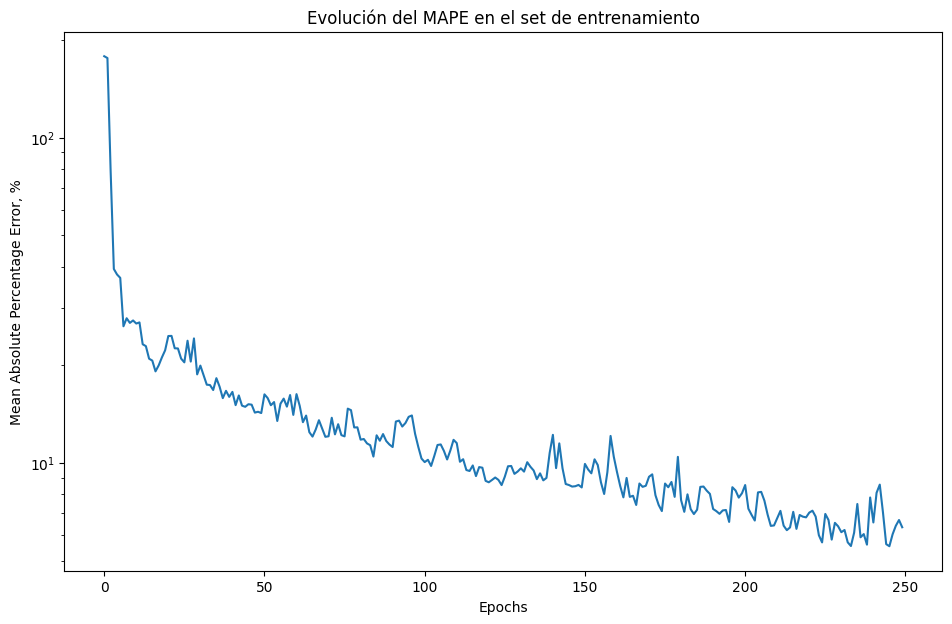

In [17]:
fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))
plt.plot(lstm_fit.history['mean_absolute_percentage_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error, %')
plt.title('Evolución del MAPE en el set de entrenamiento')
plt.yscale('log')
#plt.ylim([10**-1,10**3])
#plt.show()

plt.savefig('MAPE_entrenamiento_lstm.png')

## 3.- Evaluación

In [12]:
loss, mae, mse, mape = model_LSTM.evaluate(X_test_lstm,Y_test_lstm)

14/14 [==============================] - 0s 1ms/step - loss: 7.6765 - mean_absolute_error: 1.5018 - mean_squared_error: 7.6765 - mean_absolute_percentage_error: 8.2277


## 4.- Predicción

In [13]:
pred_2022_LSTM = model_LSTM.predict(X_lstm_2022)

8/8 [==============================] - 0s 1ms/step


# Comparación de modelos

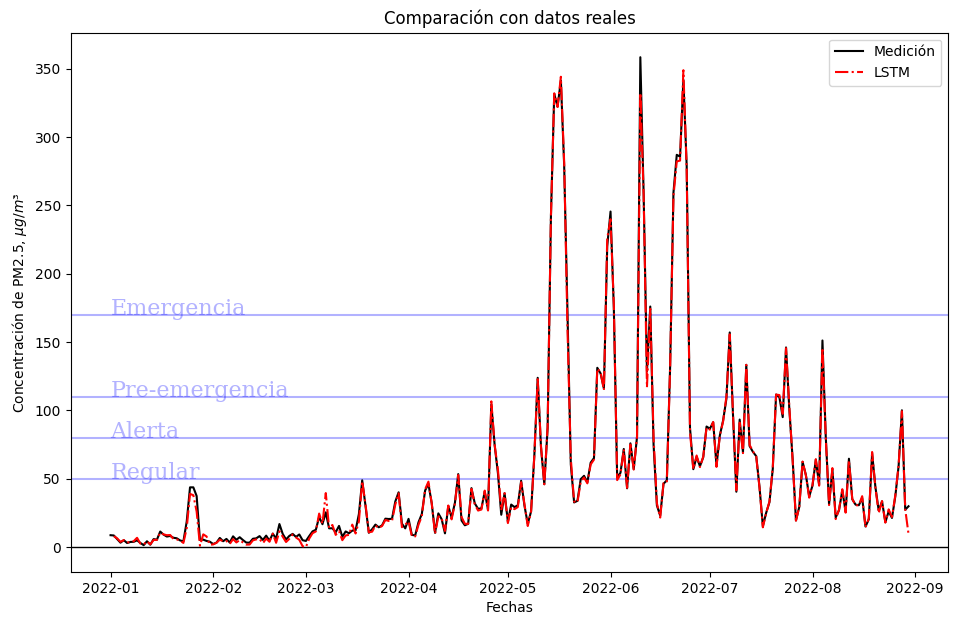

In [15]:
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        'alpha': 0.3
        }

fig = plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))

plt.axhline(y = 0, color = 'k', linestyle = '-',linewidth = 1)
plt.axhline(y = 50, color = 'b', linestyle = '-', alpha = 0.3)
plt.axhline(y = 80, color = 'b', linestyle = '-', alpha = 0.3)
plt.axhline(y = 110, color = 'b', linestyle = '-', alpha = 0.3)
plt.axhline(y = 170, color = 'b', linestyle = '-', alpha = 0.3)

plt.plot(df_2022_target, '-k', label = r'Medición')
plt.plot(df_2022_target.index[(n_steps-1)::],pred_2022_LSTM, '-.r', label = r'LSTM')

plt.legend()

plt.text(df_2022_target.index[0], 50, r'Regular', font)
plt.text(df_2022_target.index[0], 80, r'Alerta', font)
plt.text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
plt.text(df_2022_target.index[0], 170, r'Emergencia', font)

plt.title(r'Comparación con datos reales')
plt.xlabel(r'Fechas')
plt.ylabel(r'Concentración de PM2.5, $\mu g/m³$')

#plt.show()

plt.savefig('Comparacion_datos_lstm.png')

In [ ]:
print('MAPE del set de entrenamiento: ', np.round(lstm_fit.history['mean_absolute_percentage_error'][-1],3))
print('MAPE del set de test: ', np.round(mape,3))